# Gold Price Prediction using RANDOM FOREST REGRESSOR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
gold = pd.read_csv("/content/gld_price_data.csv")

In [ ]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold.shape

(2290, 6)

In [ ]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding correlation between parameters

In [ ]:
correlation = gold.corr()

<ipython-input-9-c1d2860861ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold.corr()


<Axes: >

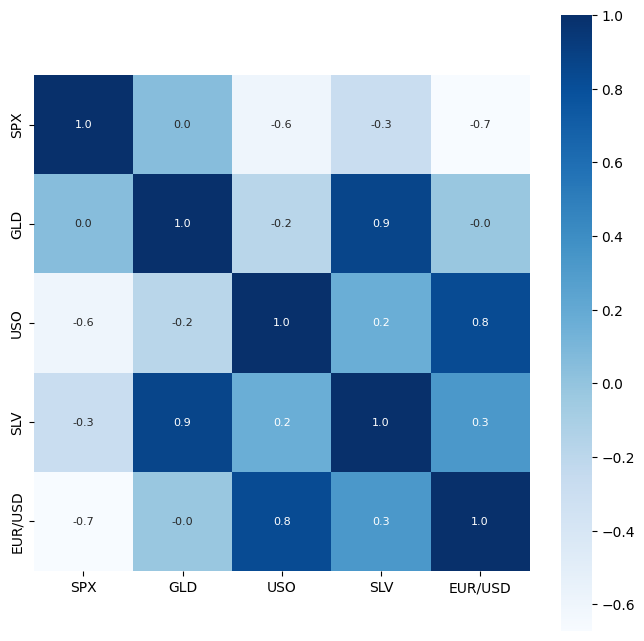

In [ ]:
# Constructing a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, annot=True, square=True, fmt=".1f", annot_kws={'size':8}, cmap = "Blues")

In [ ]:
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-12-4a0c1651f93c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold["GLD"], color = "green")


<Axes: xlabel='GLD', ylabel='Density'>

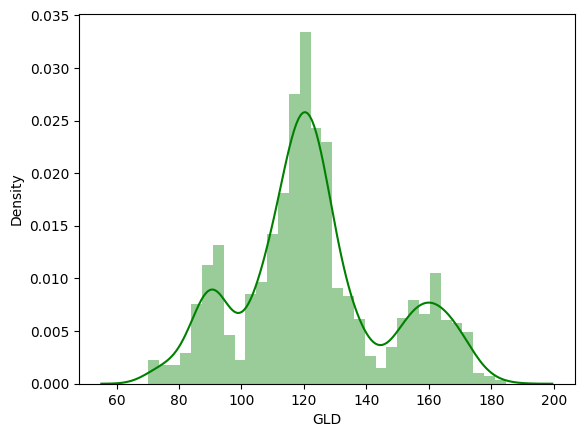

In [ ]:
# Distribution Plot
sns.distplot(gold["GLD"], color = "green")

In [ ]:
X = gold.drop(["Date", "GLD"], axis=1)
Y = gold["GLD"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

Model Training

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_pred, Y_test)

In [ ]:
print(error_score)

0.9889228814024589


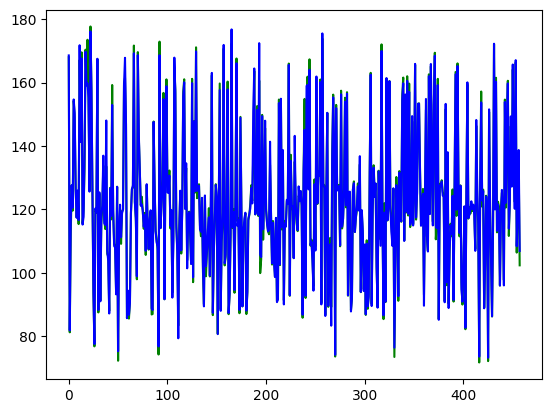

In [ ]:
plt.plot(list(Y_test), color = "green")
plt.plot(Y_pred, color = "blue")
plt.show()

# Very similar